### Dataset - Normalized with Min-max method / Without Redshift

#### Random Forest algorithm 

In [182]:
import pandas as pd # for Dataframe manupulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import numpy as np # for arrays manipulation

In [183]:
df_rf_wr = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm_wr.csv")

In [184]:
df_rf_wr

,alpha,delta,u,g,r,i,z,class
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009,0
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222,0
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187,0
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792,0
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723,0
...,...,...,...,...,...,...,...,...
56878,0.570563,0.572008,0.998900,0.999043,0.558451,0.497201,0.999193,2
56879,0.036093,0.193240,0.999066,0.999016,0.481001,0.380677,0.998867,2
56880,0.560834,0.539862,0.998664,0.998771,0.407412,0.363928,0.998888,2
56881,0.016374,0.528663,0.998509,0.998588,0.299670,0.277048,0.998685,2


In [185]:
x = df_rf_wr.drop("class",axis='columns')
x.head()

,alpha,delta,u,g,r,i,z
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723


In [186]:
y = df_rf_wr["class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
56878    2
56879    2
56880    2
56881    2
56882    2
Name: class, Length: 56883, dtype: int64

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42, stratify=y)

In [188]:
from sklearn.ensemble import RandomForestClassifier

# initializing model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [189]:
y_pred = model.predict(x_test)


In [190]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1715,   77,  104],
       [ 131, 1620,  145],
       [ 169,  228, 1500]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

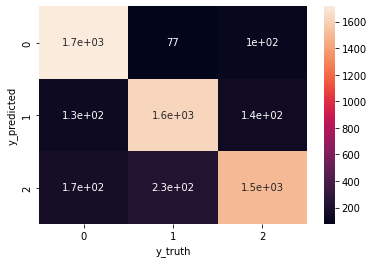

In [191]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8498857444190543
Precision: 0.8501026666577488
Recall: 0.8498961458873179
F1 Score: 0.8492595479199906


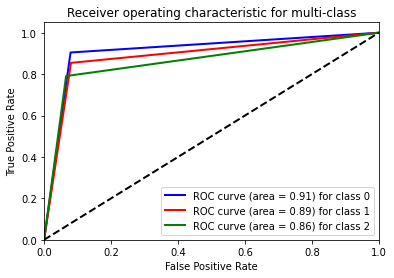

In [193]:
# Plot ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine (SVM) algorithm

In [194]:
from sklearn.svm import SVC #importing SVM module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# training the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(x_train, y_train)


SVC(C=1, kernel='linear')

In [195]:
y_pred = model_svm.predict(x_test)

In [196]:
from sklearn.metrics import confusion_matrix

# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1083,  173,  640],
       [ 109, 1543,  244],
       [ 385,  542,  970]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

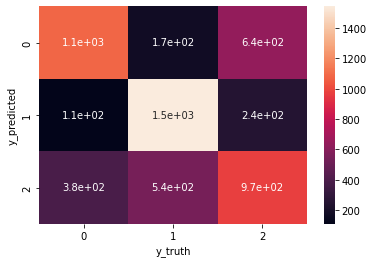

In [197]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [198]:

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6320970293548954
Precision: 0.6310960598734378
Recall: 0.6321182606039443
F1 Score: 0.6279207080090852


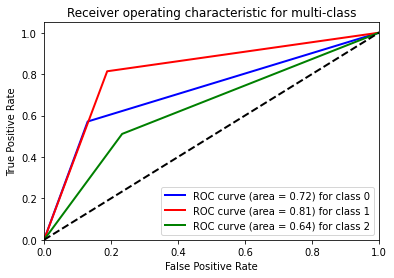

In [199]:
# Plot ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### Extremely Randomized Trees (ERT) algorithm

In [200]:
from sklearn.ensemble import ExtraTreesClassifier #importing ERT module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the ERT model and fit it to the training data
model_ert = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
model_ert.fit(x_train, y_train)

ExtraTreesClassifier()

In [201]:
y_pred = model_ert.predict(x_test)

In [202]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1718,   83,   95],
       [ 141, 1611,  144],
       [ 206,  254, 1437]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

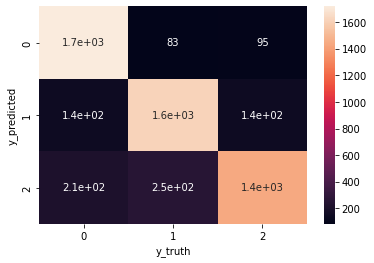

In [203]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [204]:
# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8377570750571278
Precision: 0.8387872934956956
Recall: 0.8377711828655356
F1 Score: 0.8366710592267593


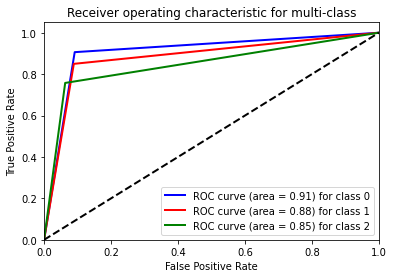

In [205]:
# plotting ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

####  Decision Tree algorithm

In [206]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the decision tree model and fit it to the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [207]:
y_pred = model_dt.predict(x_test)

In [208]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1512,  172,  212],
       [ 172, 1455,  269],
       [ 229,  254, 1414]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

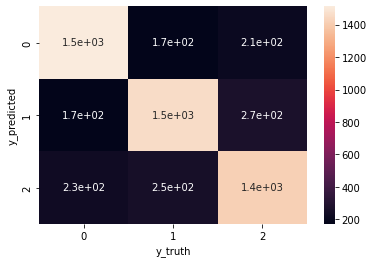

In [209]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [210]:
# calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7700826155739146
Precision: 0.7700268209850538
Recall: 0.770086957198686
F1 Score: 0.7700474978324001


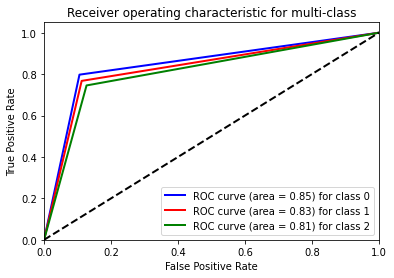

In [211]:
# plotting ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### KNN algorithm

In [212]:
from sklearn.neighbors import KNeighborsClassifier # importing KNN module

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42,stratify=y)

# initializing the knn model and fit it to the training data
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [213]:
y_pred = model_knn.predict(x_test)

In [214]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1563,  130,  203],
       [ 196, 1455,  245],
       [ 391,  489, 1017]], dtype=int64)

Text(33.0, 0.5, 'y_predicted')

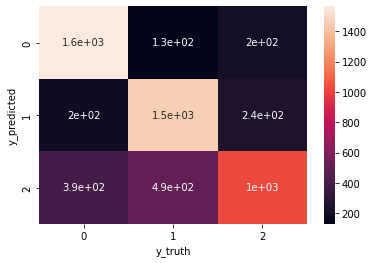

In [215]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [216]:
# calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7092634909474425
Precision: 0.7075725362171141
Recall: 0.7092939329031628
F1 Score: 0.7035364783375316


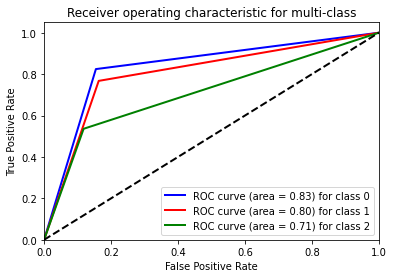

In [217]:
# plotting ROC curve for each class separately

import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

#### ANN algorithm

In [218]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


# splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# defining the model architecture
model_ann = Sequential()
model_ann.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(1, activation='sigmoid'))

# compiling the model
model_ann.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# training the model
model_ann.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
1600/1600 [==============================] - 7s 3ms/step - loss: 0.0262 - accuracy: 0.3332 - val_loss: -0.1006 - val_accuracy: 0.3356
Epoch 2/50
1600/1600 [==============================] - 5s 3ms/step - loss: -0.0642 - accuracy: 0.3331 - val_loss: -0.3179 - val_accuracy: 0.3356
Epoch 3/50
1600/1600 [==============================] - 7s 4ms/step - loss: -0.2805 - accuracy: 0.3330 - val_loss: -0.8556 - val_accuracy: 0.3356
Epoch 4/50
1600/1600 [==============================] - 6s 4ms/step - loss: -1.0723 - accuracy: 0.3319 - val_loss: -2.5958 - val_accuracy: 0.3356
Epoch 5/50
1600/1600 [==============================] - 6s 4ms/step - loss: -3.5702 - accuracy: 0.3321 - val_loss: -7.1596 - val_accuracy: 0.3356
Epoch 6/50
1600/1600 [==============================] - 6s 4ms/step - loss: -7.2856 - accuracy: 0.3308 - val_loss: -13.8241 - val_accuracy: 0.3356
Epoch 7/50
1600/1600 [==============================] - 6s 4ms/step - loss: -14.8556 - accuracy: 0.3310 - val_loss: -25.1590

In [219]:
y_pred = model_ann.predict(x_test)

178/178 [==============================] - 1s 2ms/step


In [220]:
# to obtain confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Text(33.0, 0.5, 'y_predicted')

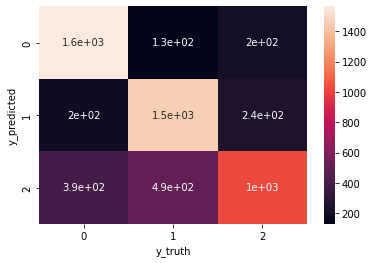

In [221]:
#to plot the heatmap using the confusion matrix

sns.heatmap(cm,annot=True)
plt.xlabel("y_truth")
plt.ylabel("y_predicted")

In [222]:
# calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


# printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

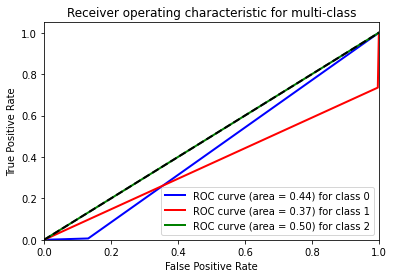

In [ ]:
import numpy as np

n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_one_vs_all = np.array([1 if y == i else 0 for y in y_test])
    y_pred_one_vs_all = np.array([1 if y == i else 0 for y in y_pred])
    fpr[i], tpr[i], _ = roc_curve(y_test_one_vs_all, y_pred_one_vs_all)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves on the same plot
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple'] # add more colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()